In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('Volve-Daily-Production-Data.csv', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   WELL_BORE_CODE            15634 non-null  object 
 2   NPD_WELL_BORE_CODE        15634 non-null  int64  
 3   NPD_WELL_BORE_NAME        15634 non-null  object 
 4   NPD_FIELD_CODE            15634 non-null  int64  
 5   NPD_FIELD_NAME            15634 non-null  object 
 6   NPD_FACILITY_CODE         15634 non-null  int64  
 7   NPD_FACILITY_NAME         15634 non-null  object 
 8   ON_STREAM_HRS             15349 non-null  float64
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 11  AVG_DP_TUBING             8980 non-null   float64
 12  AVG_ANNULUS_PRESS         7890 non-null   float64
 13  AVG_CHOKE_SIZE_P          8919 non-null   float64
 14  AVG_CH

In [4]:
df.head(3)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [5]:
df = df[['DATEPRD','WELL_BORE_CODE', 'BORE_OIL_VOL']]

In [6]:
df.head()

,DATEPRD,WELL_BORE_CODE,BORE_OIL_VOL
0,07-Apr-14,NO 15/9-F-1 C,0.0
1,08-Apr-14,NO 15/9-F-1 C,0.0
2,09-Apr-14,NO 15/9-F-1 C,0.0
3,10-Apr-14,NO 15/9-F-1 C,0.0
4,11-Apr-14,NO 15/9-F-1 C,0.0


In [7]:
well_codes = df.WELL_BORE_CODE.unique()
well_codes

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

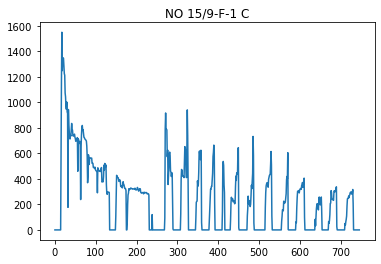

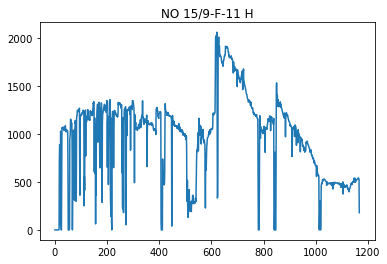

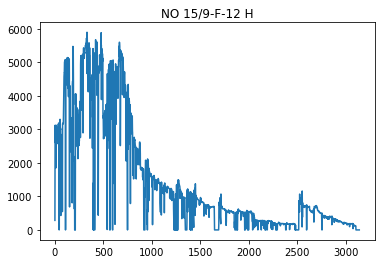

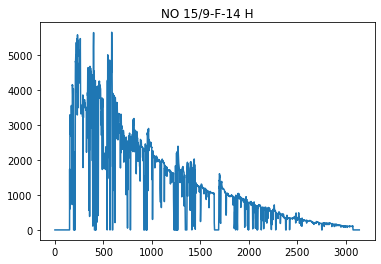

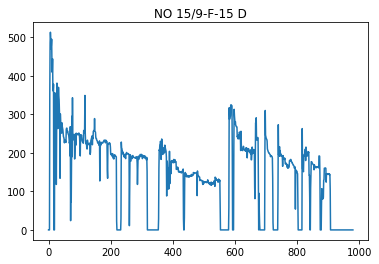

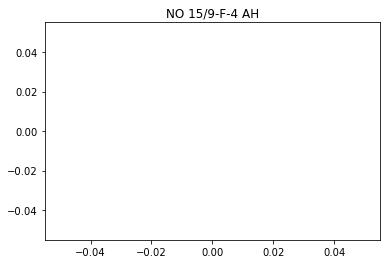

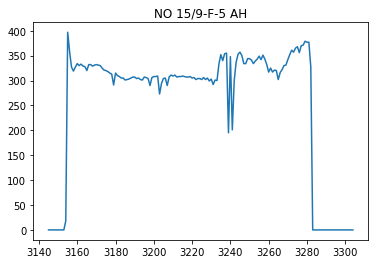

<Figure size 432x288 with 0 Axes>

In [8]:
nwells = len(well_codes)
df_wells = []

for i in range (nwells):
    df_wells.append(df[df['WELL_BORE_CODE'] == well_codes[i]])
    df_wells[i] = df_wells[i].drop(columns = 'WELL_BORE_CODE')
    df_wells[i]['DATEPRD'] = pd.to_numeric(pd.to_datetime(df_wells[i]['DATEPRD']))
    df_wells[i]['DATEPRD'] = (df_wells[i]['DATEPRD'].values - \
                              df_wells[i]['DATEPRD'].values[0]) / 86400000000000
    df_wells[i] = df_wells[i].rename(columns={'DATEPRD': 'DAY_OF_PROD', 
                                              'BORE_OIL_VOL': 'OIL_VOL_PROD'})
    
    plt.plot(df_wells[i]['DAY_OF_PROD'], df_wells[i]['OIL_VOL_PROD'])
    plt.title(well_codes[i])
    plt.show()
    plt.tight_layout()

## Integrity check: Make sure there are no missing days in the oil production data for these two wells.

In [9]:
print(df_wells[2], df_wells[3])

      DAY_OF_PROD  OIL_VOL_PROD
1911          0.0         285.0
1912          1.0        1870.0
1913          2.0        3124.0
1914          3.0        2608.0
1915          4.0        3052.0
...           ...           ...
4962       3136.0           0.0
4963       3137.0           0.0
4964       3138.0           0.0
4965       3139.0           0.0
4966       3140.0           0.0

[3056 rows x 2 columns]       DAY_OF_PROD  OIL_VOL_PROD
4967          0.0           0.0
4968          1.0           0.0
4969          2.0           0.0
4970          3.0           0.0
4971          4.0           0.0
...           ...           ...
8018       3136.0           0.0
8019       3137.0           0.0
8020       3138.0           0.0
8021       3139.0           0.0
8022       3140.0           0.0

[3056 rows x 2 columns]


In [10]:
for i in [2,3]:
    days = df_wells[i]['DAY_OF_PROD'].values
    for j in range(1,len(days)):
        diff = days[j] - days[j-1]
        if diff>1:
            print(days[j-1])
            print(days[j])
            print(f'missing day(s): {diff-1}')

75.0
77.0
missing day(s): 1.0
176.0
178.0
missing day(s): 1.0
447.0
449.0
missing day(s): 1.0
537.0
539.0
missing day(s): 1.0
566.0
568.0
missing day(s): 1.0
746.0
749.0
missing day(s): 2.0
753.0
755.0
missing day(s): 1.0
915.0
917.0
missing day(s): 1.0
917.0
920.0
missing day(s): 2.0
923.0
925.0
missing day(s): 1.0
1085.0
1089.0
missing day(s): 3.0
1224.0
1228.0
missing day(s): 3.0
1228.0
1232.0
missing day(s): 3.0
1232.0
1235.0
missing day(s): 2.0
1239.0
1241.0
missing day(s): 1.0
1245.0
1247.0
missing day(s): 1.0
1252.0
1254.0
missing day(s): 1.0
1341.0
1345.0
missing day(s): 3.0
1350.0
1352.0
missing day(s): 1.0
1381.0
1385.0
missing day(s): 3.0
1385.0
1389.0
missing day(s): 3.0
1389.0
1392.0
missing day(s): 2.0
1395.0
1397.0
missing day(s): 1.0
1400.0
1402.0
missing day(s): 1.0
1411.0
1413.0
missing day(s): 1.0
1420.0
1432.0
missing day(s): 11.0
1443.0
1445.0
missing day(s): 1.0
1644.0
1646.0
missing day(s): 1.0
1648.0
1650.0
missing day(s): 1.0
1665.0
1669.0
missing day(s): 3.0
1

##  fill missing days with prevoius values

In [11]:
for i in range (nwells):
    df_wells[i].fillna(method='bfill',inplace=True)

In [12]:
well_2 = df_wells[2]
well_3 = df_wells[3]

<AxesSubplot:>

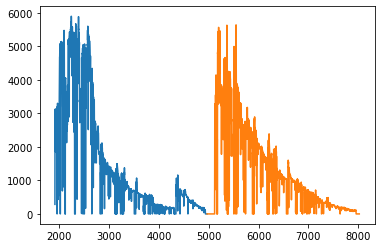

In [13]:
well_2['OIL_VOL_PROD'].plot()
well_3['OIL_VOL_PROD'].plot()

In [14]:
df = pd.read_csv('Volve-Daily-Production-Data.csv', thousands=',')

In [15]:
df.head(3)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.0,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.0,0.0,0.0,0.0,0.0,0.0,NaN,production,OP


In [16]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [17]:
import datetime

df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])

In [18]:
well_codes = df.WELL_BORE_CODE.unique()
well_codes

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

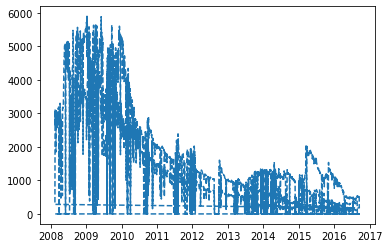

In [19]:
plt.plot(df['DATEPRD'],df['BORE_OIL_VOL'],linestyle = '--')

In [20]:
df = df[['DATEPRD','WELL_BORE_CODE','ON_STREAM_HRS','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE','BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL','FLOW_KIND']]

In [21]:
nwells = len(well_codes)
df_wells = []

for i in range (nwells):
    df_wells.append(df[df['WELL_BORE_CODE'] == well_codes[i]])
    df_wells[i] = df_wells[i].drop(columns = 'WELL_BORE_CODE')

In [22]:
well2 = df_wells[2]
well3 = df_wells[3]

In [23]:
well2

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
1911,2008-02-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0,NaN,production
1912,2008-02-13,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0,NaN,production
1913,2008-02-14,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0,NaN,production
1914,2008-02-15,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0,NaN,production
1915,2008-02-16,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,2016-09-13,0.00,0.000,0.000,0.000,19.959,0.99291,0.000,0.000,0.013,0.0,0.0,0.0,NaN,production
4963,2016-09-14,0.00,0.000,0.000,0.000,19.959,0.97304,0.000,0.000,0.016,0.0,0.0,0.0,NaN,production
4964,2016-09-15,0.00,0.000,0.000,0.000,19.959,0.97778,0.000,0.000,0.024,0.0,0.0,0.0,NaN,production
4965,2016-09-16,0.00,0.000,0.000,0.000,19.959,0.96101,0.000,0.000,0.025,0.0,0.0,0.0,NaN,production


In [24]:
well2['ON_STREAM_HRS'].unique()

array([11.5 , 24.  , 22.5 , 23.15, 23.  , 23.67, 15.14, 22.83, 23.78,
       23.83,  7.48,  0.  ,  1.19, 10.98, 14.03, 12.98,  4.  , 21.26,
       20.55,  9.38, 21.57, 22.71, 15.96,  5.25, 20.19,  0.5 , 13.42,
       22.67, 23.5 , 15.83, 21.35, 13.17,  6.31, 23.25,  7.53,  6.98,
       10.5 ,  9.71,  8.5 ,  5.71, 23.6 , 22.17, 18.29, 22.33, 19.  ,
       25.  , 23.17, 23.88, 22.  , 23.68, 15.84, 21.83, 22.64, 11.17,
       18.53, 21.23, 19.94,  6.5 , 13.  , 22.14,  4.19,  6.14,  2.48,
       20.86, 21.98, 10.66,  0.25, 23.84, 22.91, 13.93, 13.99, 21.34,
        2.16, 11.58, 14.34, 10.83, 22.01, 21.75,  6.49,  7.99,  2.68,
       24.83, 23.33, 15.5 , 21.5 , 22.42, 22.86, 23.48, 15.03, 20.14,
       13.59, 13.8 , 22.04, 18.5 , 19.69, 17.6 , 20.83, 13.34, 15.33,
       21.67, 23.09,  0.18, 20.42, 21.49,  4.18, 15.66, 23.34, 10.  ,
       20.75,  3.16, 20.34, 22.08, 14.78, 14.06, 20.5 ,  8.  , 21.25,
       22.92, 18.04, 19.59, 11.68,  7.68,  8.8 ,  8.84,  4.24, 16.18,
       18.01,  3.08,

In [25]:
multiplier = 24/well2['ON_STREAM_HRS']

In [26]:
multiplier

1911    2.086957
1912    1.000000
1913    1.066667
1914    1.036717
1915    1.000000
          ...   
4962         inf
4963         inf
4964         inf
4965         inf
4966         inf
Name: ON_STREAM_HRS, Length: 3056, dtype: float64

In [27]:
well2['new_oil'] = well2['BORE_OIL_VOL']*multiplier

In [28]:
well2['IDEAL_OIL_PROD_RATE(bbl/hrs)'] = well2['BORE_OIL_VOL']*well2['ON_STREAM_HRS']

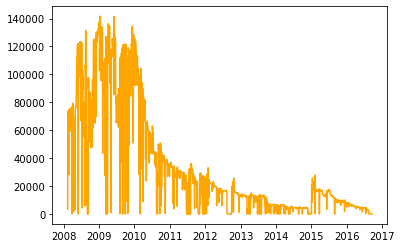

In [29]:

plt.plot(well2['DATEPRD'],well2['IDEAL_OIL_PROD_RATE(bbl/hrs)'],color= 'orange')

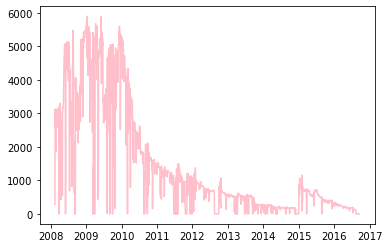

In [30]:
plt.plot(well2['DATEPRD'],well2['BORE_OIL_VOL'],color= 'pink')

In [31]:
well2 = well2[well2['new_oil']<10000]

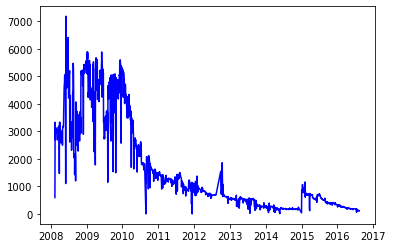

In [32]:
plt.plot(well2['DATEPRD'],well2['new_oil'],color= 'blue')

In [33]:
well2['new_water'] = well2['BORE_WAT_VOL']*multiplier

C:\Users\sahil\AppData\Local\Temp/ipykernel_6256/1730932490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well2['new_water'] = well2['BORE_WAT_VOL']*multiplier


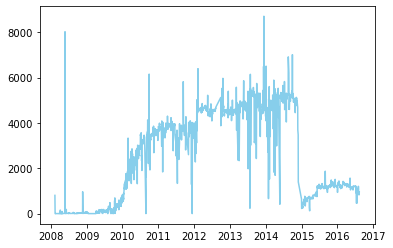

In [34]:
plt.plot(well2['DATEPRD'],well2['new_water'],color= 'skyblue')

C:\Users\sahil\AppData\Local\Temp/ipykernel_6256/1979345837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well2['new_gas'] = well2['BORE_GAS_VOL']*multiplier


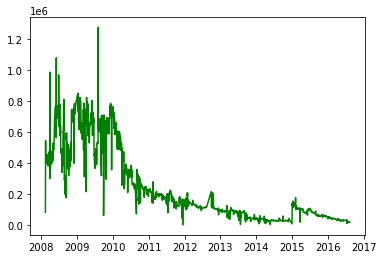

In [35]:
well2['new_gas'] = well2['BORE_GAS_VOL']*multiplier
plt.plot(well2['DATEPRD'],well2['new_gas'],color= 'green')

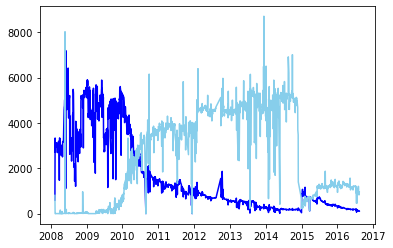

In [36]:
plt.plot(well2['DATEPRD'],well2['new_oil'],color= 'blue')
plt.plot(well2['DATEPRD'],well2['new_water'],color= 'skyblue')


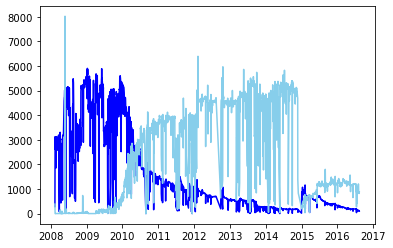

In [37]:
plt.plot(well2['DATEPRD'],well2['BORE_OIL_VOL'],color= 'blue')
plt.plot(well2['DATEPRD'],well2['BORE_WAT_VOL'],color= 'skyblue')

In [38]:
well2.fillna(0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [39]:
well2.columns

Index(['DATEPRD', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE',
       'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL',
       'FLOW_KIND', 'new_oil', 'IDEAL_OIL_PROD_RATE(bbl/hrs)', 'new_water',
       'new_gas'],
      dtype='object')

In [40]:
X1 = well2[['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','BORE_WI_VOL','BORE_WAT_VOL']][:1800]
X2 = well2[['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE','BORE_WI_VOL','BORE_WAT_VOL']][1800:]

In [41]:
y1 = well2['new_oil'][:1800]
y2 = well2['new_oil'][1800:]


In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model1 = RandomForestRegressor()

In [44]:
model1.fit(X1,y1)

RandomForestRegressor()

In [45]:
yp = model1.predict(X2)

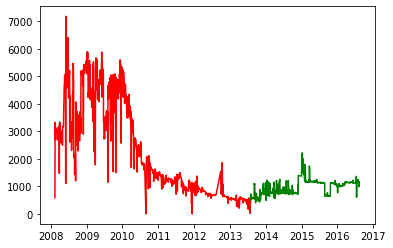

In [46]:
plt.plot(well2['DATEPRD'][:1800],y1,color= 'red')
plt.plot(well2['DATEPRD'][1800:],yp,color= 'green')

In [47]:
from sklearn.metrics import mean_absolute_error as mae

In [48]:
mae(y2,yp)

609.6981119007575

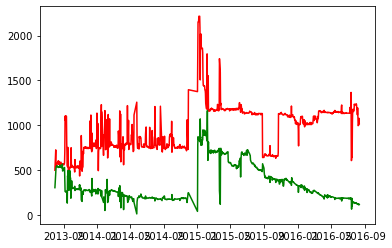

In [49]:
plt.plot(well2['DATEPRD'][1800:],yp,color= 'red')
plt.plot(well2['DATEPRD'][1800:],y2,color= 'green')

In [76]:
df = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/pyreservoir-master/data/volve/volve_input_to_mbal.csv',index_col=0)

In [77]:
df.head()

,p (psia),Np (STB),Gp (SCF),Wp (STB),Gi (SCF),Wi (STB),Rp (SCF/STB),Bo (RB/STB),Bg (RB/SCF),Rs (SCF/STB),Rv (STB/SCF)
Date,,,,,,,,,,,
2007-09-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0.0
2007-10-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0.0
2007-11-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0.0
2007-12-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0.0
2008-01-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0.0


In [79]:
import datetime
df.index = pd.to_datetime(df.index)

In [80]:
df.columns

Index(['p (psia)', 'Np (STB)', 'Gp (SCF)', 'Wp (STB)', 'Gi (SCF)', 'Wi (STB)',
       'Rp (SCF/STB)', 'Bo (RB/STB)', 'Bg (RB/SCF)', 'Rs (SCF/STB)',
       'Rv (STB/SCF)'],
      dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

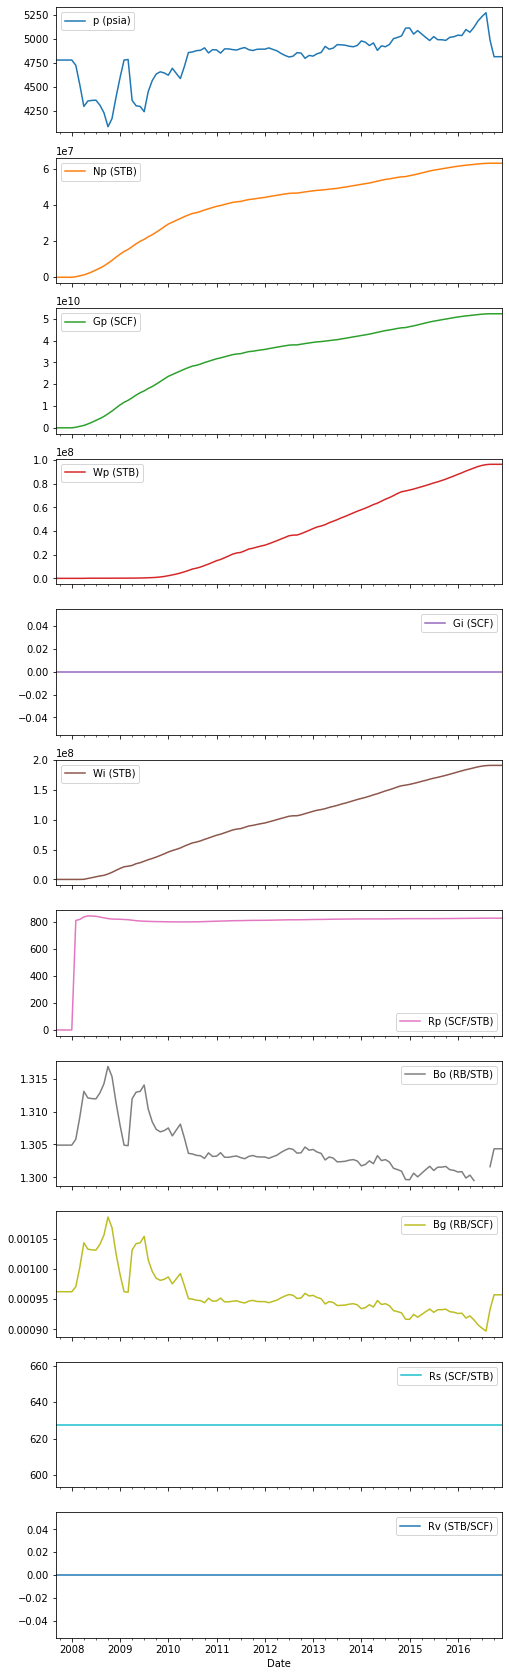

In [83]:
df.plot(subplots=True, figsize=(8,30))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bo (RB/STB)', ylabel='p (psia)'>

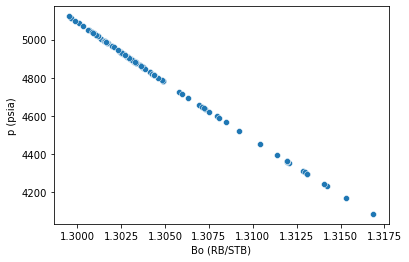

In [88]:
sns.scatterplot(df['Bo (RB/STB)'],df['p (psia)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='p (psia)'>

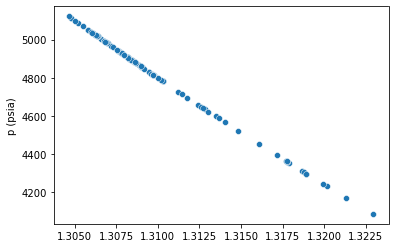

In [93]:
sns.scatterplot(5.6*df['Bg (RB/SCF)'] + df['Bo (RB/STB)'],df['p (psia)'])

In [115]:
# %load C:/Users/sahil/OneDrive/Desktop/pyreservoir-master/matbal/mbal.py
"""
Material Balance Plots
@author: Yohanes Nuwara
@email: ign.nuwara97@gmail.com
"""

def initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs):
  """
  Calculate OOIP and OGIP from Nfoi and Gfgi
  And output the result to labels in the plot
  """
  import matplotlib.patches as mpl_patches
  
  Rvi, Rsi = Rv[0], Rs[0]
  OOIP = Nfoi + Gfgi * Rvi
  OGIP = Gfgi + Nfoi * Rsi

  labels = []
  labels.append("Nfoi = {0:.4g} STB".format(Nfoi))
  labels.append("Gfgi = {0:.4g} SCF".format(Gfgi))
  labels.append("OOIP = {0:.4g} STB".format(OOIP))
  labels.append("OGIP = {0:.4g} SCF".format(OGIP))

  handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                  lw=0, alpha=0)] * 4
  return labels, handles, OOIP, OGIP   

class drygas():
    """
    Dry-Gas Material Balance Plot
    """
    def calculate_params(self, p, Bg, Gp, cf, cw, swi):
        """
        Calculate Material Balance Paramaters for Dry-Gas Reservoir
        
        Output: F, Btg, Efw, Eg
        
        """
        import numpy as np

        pi = p[0]
        Bgi = Bg[0]

        # total gas FVF equals the gas FVF itself (for dry-gas)
        Btg = Bg

        # calculate Efw
        Efw = ((cf + cw * swi) / (1 - swi)) * (pi - p)

        F = []; Eg = []
        for i in range(len(p)):
            F_ = Bg[i] * Gp[i]
            Eg_ = Btg[i] - Bgi
            F.append(F_); Eg.append(Eg_)

        F = np.array(F); Eg = np.array(Eg)
        return F, Btg, Efw, Eg

    def plot(self, p, z, Gp, F, Btg, Efw, Eg):
        """Create Material Balance Plots for Dry-Gas Reservoir"""
        import numpy as np
        import matplotlib.pyplot as plt
        from scipy.optimize import curve_fit

        # no volatile and vapor component, define Rv as zeros
        Rv, Rs = np.zeros(len(p)), np.zeros(len(p))

        # plot attributes
        title_size = 12
        title_pad = 10

        # linear function for curve-fit
        def linear_zero_intercept(x, m):
            y = m * x
            return y

        def linear_with_intercept(x, m, c):
            y = m * x + c
            return y

        # Plot 1: F vs Eg
        plt.subplot(3,2,1)
        x1, y1 = Eg, F
        plt.plot(x1, y1, '.-')
        plt.title('Plot 1: F vs Eg', size=title_size, pad=title_pad)
        plt.xlabel('Eg (RB/scf)')
        plt.ylabel('F (res ft3)')

        ## curve-fitting to calculate the slope as OGIP
        x1_norm = x1 / max(x1) # normalize x
        y1_norm = y1 / max(y1) # normalize y
        popt, pcov = curve_fit(linear_zero_intercept, x1_norm, y1_norm)

        m = popt[0]
        Gfgi = m * max(y1) / max(x1) # denormalize the slope, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs) 

        ## plot the regression line
        x1_fit = np.linspace(min(x1), max(x1), 5)
        y1_fit = linear_zero_intercept(x1_fit, Gfgi)
        plt.plot(x1_fit, y1_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0) 

        # Plot 2: p/z vs Gp
        plt.subplot(3,2,2)
        x2, y2 = Gp, (p / z)
        plt.plot(x2, y2, '.-')
        plt.title('Plot 2: p/z vs Gp', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('p/z (psia)')

        ## curve-fitting to calculate the slope as OGIP
        x2_norm = x2 / max(x2) # normalize x
        y2_norm = y2 / max(y2) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

        m, c = popt[0], popt[1]
        Gfgi = (-c / m) * max(x2) # OGIP is the intercept at x-axis, and denormalized
        m = m * max(y2) / max(x2) # denormalize the slope
        c = c * max(y2) # denormalize the intercept

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

        ## plot the regression line
        x2_fit = np.linspace(min(x2), max(x2), 5)
        y2_fit = linear_with_intercept(x2_fit, m, c)
        plt.plot(x2_fit, y2_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)       

        # Plot 3: F/Eg vs Gp
        plt.subplot(3,2,3)
        x3, y3 = Gp, (F / Eg)
        plt.plot(x3, y3, '.-')
        plt.title('Plot 3: Waterdrive Diagnostic Plot', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('F/Eg (scf)')

        ## curve-fitting to calculate the slope as OGIP, here [1:] because NaN is removed
        x3_norm = x3[1:] / max(x3[1:]) # normalize x
        y3_norm = y3[1:] / max(y3[1:]) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x3_norm, y3_norm)

        m, c = popt[0], popt[1]
        m = m * max(y3[1:]) / max(x3[1:]) # denormalize the slope
        Gfgi = c * max(y3[1:]) # denormalize the intercept, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

        ## plot the regression line
        x3_fit = np.linspace(min(x3[1:]), max(x3[1:]), 5)
        y3_fit = linear_with_intercept(x3_fit, m, Gfgi)
        plt.plot(x3_fit, y3_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)           

        # Plot 6: F vs (Eg+Bgi*Efw)
        plt.subplot(3,2,4)
        Bgi = Btg[0]
        x6, y6 = (Eg + Bgi * Efw), F
        plt.plot(x6, y6, '.-')
        plt.title('Plot 6: F vs (Eg+Bgi*Efw)', size=title_size, pad=title_pad)
        plt.xlabel('Eg+Bgi*Efw (res ft3/scf)')
        plt.ylabel('F (res ft3)')

        ## curve-fitting to calculate the slope as OGIP
        x6_norm = x6 / max(x6) # normalize x
        y6_norm = y6 / max(y6) # normalize y
        popt, pcov = curve_fit(linear_zero_intercept, x6_norm, y6_norm)

        m = popt[0]
        Gfgi = m * max(y6) / max(x6) # denormalize the slope, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

        ## plot the regression line
        x6_fit = np.linspace(min(x6), max(x6), 5)
        y6_fit = linear_zero_intercept(x6_fit, Gfgi)
        plt.plot(x6_fit, y6_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)     

        # Plot 7: ((p/z)*(1-Efw)) vs Gp
        plt.subplot(3,2,5)
        x7, y7 = Gp, ((p / z) * (1 - Efw))
        plt.plot(x7, y7, '.-')
        plt.title('Plot 7: ((p/z)*(1-Efw)) vs Gp', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('(p/z)*(1-Efw) (psia)')

        ## curve-fitting to calculate the slope as OGIP
        x7_norm = x7 / max(x7) # normalize x
        y7_norm = y7 / max(y7) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x7_norm, y7_norm)

        m, c = popt[0], popt[1]
        Gfgi = (-c / m) * max(x7) # OGIP is the intercept at x-axis, and denormalized
        m = m * max(y7) / max(x7) # denormalize the slope
        c = c * max(y7) # denormalize the intercept

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

        ## plot the regression line
        x7_fit = np.linspace(min(x7), max(x7), 5)
        y7_fit = linear_with_intercept(x7_fit, m, c)
        plt.plot(x7_fit, y7_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0) 

        plt.tight_layout(pad=1.5)
        plt.show()

        return F, Eg, Efw

class gascondensate():
    """
    Gas-Condensate Material Balance Plot
    """
    def calculate_params(self, p, pdew, Bg, Bo, Np, Gp, Gi, cf, cw, swi, Rs, Rv):
        """
        Calculate Material Balance Paramaters for Gas-Condensate Reservoir
        
        Output: F, Btg, Efw, Eg
        """
        import numpy as np
        pi = p[0]
        Rvi = Rv[0]
        Bgi = Bg[0]

        # calculate Efw
        Efw = ((cf + cw * swi) / (1 - swi)) * (pi - p)

        # calculate F and Btg
        F = []; Btg = []; Eg = []
        for i in range(len(p)):
            if p[i] >= pdew:
                # gas-condensate above dewpoint pressure
                F_ = Bg[i] * Gp[i]
                Btg_ = Bg[i]
                Eg_ = Btg_ - Bgi

            if p[i] < pdew:
                # gas-condensate below dewpoint pressure
                F_ = (Np[i] * ((Bo[i] - (Rs[i] * Bg[i])) / (1 - (Rv[i] * Rs[i])))) + ((Gp[i] - Gi[i]) * ((Bg[i] - (Rv[i] * Bo[i])) / (1 - (Rv[i] * Rs[i]))))
                Btg_ = ((Bg[i] * (1 - (Rs[i] * Rvi))) + (Bo[i] * (Rvi - Rv[i]))) / (1 - (Rv[i] * Rs[i]))  # in RB/STB
                Eg_ = Btg_ - Bgi

            F.append(F_); Btg.append(Btg_); Eg.append(Eg_)

        F, Btg, Eg = np.array(F), np.array(Btg), np.array(Eg)

        return F, Btg, Efw, Eg

    def plot(self, p, z, Gp, F, Btg, Efw, Eg, Rv):
        """Create Material Balance Plots for Dry-Gas Reservoir"""
        import numpy as np
        import matplotlib.pyplot as plt
        from scipy.optimize import curve_fit
        
        # no vapor component, define Rs as zeros
        Rs = np.zeros(len(p))

        # plot attributes
        title_size = 12
        title_pad = 10

        # linear function for curve-fit
        def linear_zero_intercept(x, m):
            y = m * x
            return y

        def linear_with_intercept(x, m, c):
            y = m * x + c
            return y

        # Plot 1: F vs Eg
        plt.subplot(3,2,1)
        x1, y1 = Eg, F
        plt.plot(x1, y1, '.-')
        plt.title('Plot 1: F vs Eg', size=title_size, pad=title_pad)
        plt.xlabel('Eg (RB/scf)')
        plt.ylabel('F (res ft3)')

        ## curve-fitting to calculate the slope as OGIP
        x1_norm = x1 / max(x1) # normalize x
        y1_norm = y1 / max(y1) # normalize y
        popt, pcov = curve_fit(linear_zero_intercept, x1_norm, y1_norm)

        m = popt[0]
        Gfgi = m * max(y1) / max(x1) # denormalize the slope, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

        ## plot the regression line
        x1_fit = np.linspace(min(x1), max(x1), 5)
        y1_fit = linear_zero_intercept(x1_fit, Gfgi)
        plt.plot(x1_fit, y1_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0) 

        # Plot 2: p/z vs Gp
        plt.subplot(3,2,2)
        plt.title('Plot 2: p/z vs Gp', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('p/z (psia)')

        if np.all(z==0) == False:        
          x2, y2 = Gp, (p / z)
          plt.plot(x2, y2, '.-')

          ## curve-fitting to calculate the slope as OGIP
          x2_norm = x2 / max(x2) # normalize x
          y2_norm = y2 / max(y2) # normalize y
          popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

          m, c = popt[0], popt[1]
          Gfgi = (-c / m) * max(x2) # OGIP is the intercept at x-axis, and denormalized
          m = m * max(y2) / max(x2) # denormalize the slope
          c = c * max(y2) # denormalize the intercept

          ## Output results into text in plot
          Nfoi = 0
          labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)       

          ## plot the regression line
          x2_fit = np.linspace(min(x2), max(x2), 5)
          y2_fit = linear_with_intercept(x2_fit, m, c)
          plt.plot(x2_fit, y2_fit)

          plt.legend(handles, labels, loc='best', fontsize='small', 
                    fancybox=True, framealpha=0.7, 
                    handlelength=0, handletextpad=0)   

        # Plot 3: F/Eg vs Gp
        plt.subplot(3,2,3)
        x3, y3 = Gp, (F / Eg)
        plt.plot(x3, y3, '.-')
        plt.title('Plot 3: Waterdrive Diagnostic Plot', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('F/Eg (scf)')

        ## curve-fitting to calculate the slope as OGIP, here [1:] because NaN is removed
        x3_norm = x3[1:] / max(x3[1:]) # normalize x
        y3_norm = y3[1:] / max(y3[1:]) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x3_norm, y3_norm)

        m, c = popt[0], popt[1]
        m = m * max(y3[1:]) / max(x3[1:]) # denormalize the slope
        Gfgi = c * max(y3[1:]) # denormalize the intercept, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)      

        ## plot the regression line
        x3_fit = np.linspace(min(x3[1:]), max(x3[1:]), 5)
        y3_fit = linear_with_intercept(x3_fit, m, Gfgi)
        plt.plot(x3_fit, y3_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)         

        # Plot 6: F vs (Eg+Bgi*Efw)
        plt.subplot(3,2,4)
        Bgi = Btg[0]
        x6, y6 = (Eg + Bgi * Efw), F
        plt.plot(x6, y6, '.-')
        plt.title('Plot 6: F vs (Eg+Bgi*Efw)', size=title_size, pad=title_pad)
        plt.xlabel('Eg+Bgi*Efw (res ft3/scf)')
        plt.ylabel('F (res ft3)')

        ## curve-fitting to calculate the slope as OGIP
        x6_norm = x6 / max(x6) # normalize x
        y6_norm = y6 / max(y6) # normalize y
        popt, pcov = curve_fit(linear_zero_intercept, x6_norm, y6_norm)

        m = popt[0]
        Gfgi = m * max(y6) / max(x6) # denormalize the slope, hence the OGIP

        ## Output results into text in plot
        Nfoi = 0
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)      

        ## plot the regression line
        x6_fit = np.linspace(min(x6), max(x6), 5)
        y6_fit = linear_zero_intercept(x6_fit, Gfgi)
        plt.plot(x6_fit, y6_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)      

        # Plot 7: ((p/z)*(1-Efw)) vs Gp
        plt.subplot(3,2,5)
        plt.title('Plot 7: ((p/z)*(1-Efw)) vs Gp', size=title_size, pad=title_pad)
        plt.xlabel('Gp (scf)')
        plt.ylabel('(p/z)*(1-Efw) (psia)')        

        if np.all(z==0) == False:
          x7, y7 = Gp, ((p / z) * (1 - Efw))
          plt.plot(x7, y7, '.-')

          ## curve-fitting to calculate the slope as OGIP
          x7_norm = x7 / max(x7) # normalize x
          y7_norm = y7 / max(y7) # normalize y
          popt, pcov = curve_fit(linear_with_intercept, x7_norm, y7_norm)

          m, c = popt[0], popt[1]
          Gfgi = (-c / m) * max(x7) # OGIP is the intercept at x-axis, and denormalized
          m = m * max(y7) / max(x7) # denormalize the slope
          c = c * max(y7) # denormalize the intercept

          ## Output results into text in plot
          Nfoi = 0
          labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)         

          ## plot the regression line
          x7_fit = np.linspace(min(x7), max(x7), 5)
          y7_fit = linear_with_intercept(x7_fit, m, c)
          plt.plot(x7_fit, y7_fit)

          plt.legend(handles, labels, loc='best', fontsize='small', 
                    fancybox=True, framealpha=0.7, 
                    handlelength=0, handletextpad=0) 

        plt.tight_layout(pad=1.5)
        plt.show()

        return F, Eg, Efw  

class oil():
    """
    Oil (Undersaturated and saturated; Volatile and Non-volatile) Material Balance Plot
    """
    def calculate_params(self, p, Bo, Bg, Rv, Rs, Np, Gp, Gi, cf, cw, swi):
        """
        Calculate Material Balance Paramaters for Oil Reservoir
        
        Output: F, Bto, Btg, Efw, Eo, Eg
        """
        pi = p[0]
        Rsi = Rs[0]
        Rvi = Rv[0]
        Boi = Bo[0]
        Bgi = Bg[0]

        # calculate Efw
        Efw = ((cf + cw * swi) / (1 - swi)) * (pi - p)

        # calculate F, Bto, and Btg
        F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
        Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs))  # in RB/STB
        Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs))  # in RB/scf

        # calculate Eo and Eg
        Eo = Bto - Boi
        Eg = Btg - Bgi

        return F, Bto, Btg, Efw, Eo, Eg

    def gascap(self, Gfgi, Nfoi, Bg, Bo):
      """
      Calculate Total Oil+Gas Expansion Factor from known Gas Cap ratio
      Gfgi and Nfoi known from volumetrics
      """
      Bgi, Boi = Bg[0], Bo[0]

      m = (Gfgi * Bgi) / (Nfoi * Boi)
      return m

    def plot(self, oil_type, F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, start=0, end=-1, figsize=(10,5)):
      """
      Create Material Balance Plots for Oil Reservoir
      
      Input:
      oil_type: 'undersaturated' or 'saturated'
      """
      import numpy as np
      import matplotlib.pyplot as plt
      from scipy.optimize import curve_fit
      import matplotlib.patches as mpl_patches

      # plot attributes
      title_size = 15
      title_pad = 14

      # linear function for curve-fit
      def linear_zero_intercept(x, m):
          y = m * x
          return y

      def linear_with_intercept(x, m, c):
          y = m * x + c
          return y

      if oil_type == 'undersaturated':

        plt.figure(figsize=figsize)

        " Plot 1: F vs (Eg+Boi*Efw) "

        plt.subplot(1,2,1)
        Boi = Bo[0]
        x1, y1 = (Eg + Boi * Efw), F
        plt.plot(x1, y1, '.-')
        plt.title(r'Plot 1: $F$ vs $(E_o+B_{oi}*E_{fw})$', size=title_size, pad=title_pad)
        plt.xlabel(r'$E_o+B_{oi}E_{fw}$ (RB/STB)', size=15)
        plt.ylabel(r'$F$ (res bbl)', size=15)

        ## curve-fitting to calculate the slope as OOIP
        x1_norm = x1 / max(x1) # normalize x
        y1_norm = y1 / max(y1) # normalize y

        x1_norm = x1_norm[start:end]
        y1_norm = y1_norm[start:end]

        popt, pcov = curve_fit(linear_zero_intercept, x1_norm, y1_norm)

        m = popt[0]
        Nfoi = m * max(y1) / max(x1) # denormalize the slope, hence the OGIP

        ## Calculate OOIP and OGIP from Nfoi
        Rsi = Rs[0]
        Gfgi = 0 # no free gas phase in undersaturated oil
        OOIP = Nfoi
        OGIP = Nfoi * Rsi

        ## Output results into text in plot
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

        ## plot the regression line
        x1_fit = np.linspace(min(x1), max(x1), 5)
        y1_fit = linear_zero_intercept(x1_fit, Nfoi)
        plt.plot(x1_fit, y1_fit, label='{} MMSTB'.format(np.round(Nfoi * 1E-6, 3)))

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0) 

        " Plot 2: F/(Eg+Boi*Efw) vs Np (Waterdrive Diagnostic Plot) "

        plt.subplot(1,2,2)
        x2, y2 = Np, F / (Eg + Boi * Efw)
        plt.plot(x2, y2, '.-')
        plt.title('Plot 2: Waterdrive Diagnostic Plot', size=title_size, pad=title_pad)
        plt.xlabel(r'$N_p$ (STB)', size=15)
        plt.ylabel(r'$\frac{F}{(E_o+B_{oi}E_{fw})}$ (STB)', size=15)

        ## curve-fitting to calculate the slope as OOIP, here [1:] because NaN is removed
        x2_norm = x2[1:] / max(x2[1:]) # normalize x
        y2_norm = y2[1:] / max(y2[1:]) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

        m, c = popt[0], popt[1]
        m = m * max(y2[1:]) / max(x2[1:]) # denormalize the slope
        Nfoi = c * max(y2[1:]) # denormalize the intercept, hence the OGIP

        ## Calculate OOIP and OGIP from Nfoi
        Rsi = Rs[0]
        Gfgi = 0 # no free gas phase in undersaturated oil
        OOIP = Nfoi
        OGIP = Nfoi * Rsi

        ## Output results into text in plot
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)           

        ## plot the regression line
        x2_fit = np.linspace(min(x2[1:]), max(x2[1:]), 5)
        y2_fit = linear_with_intercept(x2_fit, m, Nfoi)
        plt.plot(x2_fit, y2_fit, label='{} MMSTB'.format(np.round(Nfoi * 1E-6, 3)))

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)  
        
        plt.tight_layout(1)
        plt.show()

      if oil_type == 'saturated':

        plt.figure(figsize=figsize)

        " Plot 1: F/Eo vs Eg/Eo "

        plt.subplot(1,3,1)
        x1, y1 = (Eg / Eo), (F / Eo)
        plt.plot(x1, y1, '.-')
        plt.title('Plot 1: F/Eo vs Eg/Eo', size=title_size, pad=title_pad)
        plt.xlabel(r'$\frac{Eg}{Eo}$ (STB/scf)', size=15)
        plt.ylabel(r'$\frac{F}{Eo}$ (STB)', size=15)

        ## curve-fitting to calculate the slope as Gfgi, intercept as Nfoi
        x1_norm = x1[1:] / max(x1[1:]) # normalize x
        y1_norm = y1[1:] / max(y1[1:]) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x1_norm, y1_norm)

        m, c = popt[0], popt[1]
        Gfgi = m = m * max(y1[1:]) / max(x1[1:]) # denormalize the slope
        Nfoi = c = c * max(y1[1:]) # denormalize the intercept

        ## calculate OOIP and OGIP from Nfoi and Gfgi
        Rsi, Rvi = Rs[0], Rv[0]
        OOIP = Nfoi + Gfgi * Rvi
        OGIP = Gfgi + Nfoi * Rsi

        ## Output results into text in plot
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

        ## plot the regression line
        x1_fit = np.linspace(min(x1[1:]), max(x1[1:]), 5)
        y1_fit = linear_with_intercept(x1_fit, m, c)
        plt.plot(x1_fit, y1_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0)

        " Plot 2: p/z vs Gp "

        plt.subplot(1,3,2)
        x2, y2 =  (Eo / Eg), (F / Eg)
        plt.plot(x2, y2, '.-')
        plt.title('Plot 2: F/Eg vs Eo/Eg', size=title_size, pad=title_pad)
        plt.xlabel(r'$\frac{Eo}{Eg}$ (scf/STB)', size=15)
        plt.ylabel(r'$\frac{F}{Eg}$ (scf)', size=15)

        ## curve-fitting to calculate the slope as Nfoi, intercept as Gfgi
        x2_norm = x2[1:] / max(x2[1:]) # normalize x
        y2_norm = y2[1:] / max(y2[1:]) # normalize y
        popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

        m, c = popt[0], popt[1]
        Nfoi = m = m * max(y2[1:]) / max(x2[1:]) # denormalize the slope
        Gfgi = c = c * max(y2[1:]) # denormalize the intercept

        ## calculate OOIP and OGIP from Nfoi and Gfgi
        Rsi, Rvi = Rs[0], Rv[0]
        OOIP = Nfoi + Gfgi * Rvi
        OGIP = Gfgi + Nfoi * Rsi

        ## Output results into text in plot
        labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

        ## plot the regression line
        x2_fit = np.linspace(min(x2[1:]), max(x2[1:]), 5)
        y2_fit = linear_with_intercept(x2_fit, m, c)
        plt.plot(x2_fit, y2_fit)

        plt.legend(handles, labels, loc='best', fontsize='small', 
                   fancybox=True, framealpha=0.7, 
                   handlelength=0, handletextpad=0) 

        plt.tight_layout(1)                 

        plt.show()       

      def plot(self, oil_type, F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, figsize=(10,5)):
#       """
#       Create Material Balance Plots for Oil Reservoir
      
#       Input:
#       oil_type: 'undersaturated' or 'saturated'
#       """
#       import numpy as np
#       import matplotlib.pyplot as plt
#       from scipy.optimize import curve_fit
#       import matplotlib.patches as mpl_patches

#       # plot attributes
#       title_size = 15
#       title_pad = 14

#       # linear function for curve-fit
#       def linear_zero_intercept(x, m):
#           y = m * x
#           return y

#       def linear_with_intercept(x, m, c):
#           y = m * x + c
#           return y

#       if oil_type == 'undersaturated':

#         plt.figure(figsize=figsize)

#         " Plot 1: F vs (Eg+Boi*Efw) "

#         plt.subplot(1,2,1)
#         Boi = Bo[0]
#         x1, y1 = (Eg + Boi * Efw), F
#         plt.plot(x1, y1, '.-')
#         plt.title(r'Plot 1: $F$ vs $(E_o+B_{oi}*E_{fw})$', size=title_size, pad=title_pad)
#         plt.xlabel(r'$E_o+B_{oi}E_{fw}$ (RB/STB)', size=15)
#         plt.ylabel(r'$F$ (res bbl)', size=15)

#         ## curve-fitting to calculate the slope as OOIP
#         x1_norm = x1 / max(x1) # normalize x
#         y1_norm = y1 / max(y1) # normalize y
#         popt, pcov = curve_fit(linear_zero_intercept, x1_norm, y1_norm)

#         m = popt[0]
#         Nfoi = m * max(y1) / max(x1) # denormalize the slope, hence the OGIP

#         ## Calculate OOIP and OGIP from Nfoi
#         Rsi = Rs[0]
#         Gfgi = 0 # no free gas phase in undersaturated oil
#         OOIP = Nfoi
#         OGIP = Nfoi * Rsi

#         ## Output results into text in plot
#         labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

#         ## plot the regression line
#         x1_fit = np.linspace(min(x1), max(x1), 5)
#         y1_fit = linear_zero_intercept(x1_fit, Nfoi)
#         plt.plot(x1_fit, y1_fit, label='{} MMSTB'.format(np.round(Nfoi * 1E-6, 3)))

#         plt.legend(handles, labels, loc='best', fontsize='small', 
#                    fancybox=True, framealpha=0.7, 
#                    handlelength=0, handletextpad=0) 

#         " Plot 2: F/(Eg+Boi*Efw) vs Np (Waterdrive Diagnostic Plot) "

#         plt.subplot(1,2,2)
#         x2, y2 = Np, F / (Eg + Boi * Efw)
#         plt.plot(x2, y2, '.-')
#         plt.title('Plot 2: Waterdrive Diagnostic Plot', size=title_size, pad=title_pad)
#         plt.xlabel(r'$N_p$ (STB)', size=15)
#         plt.ylabel(r'$\frac{F}{(E_o+B_{oi}E_{fw})}$ (STB)', size=15)

#         ## curve-fitting to calculate the slope as OOIP, here [1:] because NaN is removed
#         x2_norm = x2[1:] / max(x2[1:]) # normalize x
#         y2_norm = y2[1:] / max(y2[1:]) # normalize y
#         popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

#         m, c = popt[0], popt[1]
#         m = m * max(y2[1:]) / max(x2[1:]) # denormalize the slope
#         Nfoi = c * max(y2[1:]) # denormalize the intercept, hence the OGIP

#         ## Calculate OOIP and OGIP from Nfoi
#         Rsi = Rs[0]
#         Gfgi = 0 # no free gas phase in undersaturated oil
#         OOIP = Nfoi
#         OGIP = Nfoi * Rsi

#         ## Output results into text in plot
#         labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)           

#         ## plot the regression line
#         x2_fit = np.linspace(min(x2[1:]), max(x2[1:]), 5)
#         y2_fit = linear_with_intercept(x2_fit, m, Nfoi)
#         plt.plot(x2_fit, y2_fit, label='{} MMSTB'.format(np.round(Nfoi * 1E-6, 3)))

#         plt.legend(handles, labels, loc='best', fontsize='small', 
#                    fancybox=True, framealpha=0.7, 
#                    handlelength=0, handletextpad=0)  
        
#         plt.tight_layout(1)
#         plt.show()

#       if oil_type == 'saturated':

#         plt.figure(figsize=figsize)

#         " Plot 1: F/Eo vs Eg/Eo "

#         plt.subplot(1,3,1)
#         x1, y1 = (Eg / Eo), (F / Eo)
#         plt.plot(x1, y1, '.-')
#         plt.title('Plot 1: F/Eo vs Eg/Eo', size=title_size, pad=title_pad)
#         plt.xlabel(r'$\frac{Eg}{Eo}$ (STB/scf)', size=15)
#         plt.ylabel(r'$\frac{F}{Eo}$ (STB)', size=15)

#         ## curve-fitting to calculate the slope as Gfgi, intercept as Nfoi
#         x1_norm = x1[1:] / max(x1[1:]) # normalize x
#         y1_norm = y1[1:] / max(y1[1:]) # normalize y
#         popt, pcov = curve_fit(linear_with_intercept, x1_norm, y1_norm)

#         m, c = popt[0], popt[1]
#         Gfgi = m = m * max(y1[1:]) / max(x1[1:]) # denormalize the slope
#         Nfoi = c = c * max(y1[1:]) # denormalize the intercept

#         ## calculate OOIP and OGIP from Nfoi and Gfgi
#         Rsi, Rvi = Rs[0], Rv[0]
#         OOIP = Nfoi + Gfgi * Rvi
#         OGIP = Gfgi + Nfoi * Rsi

#         ## Output results into text in plot
#         labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

#         ## plot the regression line
#         x1_fit = np.linspace(min(x1[1:]), max(x1[1:]), 5)
#         y1_fit = linear_with_intercept(x1_fit, m, c)
#         plt.plot(x1_fit, y1_fit)

#         plt.legend(handles, labels, loc='best', fontsize='small', 
#                    fancybox=True, framealpha=0.7, 
#                    handlelength=0, handletextpad=0)

#         " Plot 2: p/z vs Gp "

#         plt.subplot(1,3,2)
#         x2, y2 =  (Eo / Eg), (F / Eg)
#         plt.plot(x2, y2, '.-')
#         plt.title('Plot 2: F/Eg vs Eo/Eg', size=title_size, pad=title_pad)
#         plt.xlabel(r'$\frac{Eo}{Eg}$ (scf/STB)', size=15)
#         plt.ylabel(r'$\frac{F}{Eg}$ (scf)', size=15)

#         ## curve-fitting to calculate the slope as Nfoi, intercept as Gfgi
#         x2_norm = x2[1:] / max(x2[1:]) # normalize x
#         y2_norm = y2[1:] / max(y2[1:]) # normalize y
#         popt, pcov = curve_fit(linear_with_intercept, x2_norm, y2_norm)

#         m, c = popt[0], popt[1]
#         Nfoi = m = m * max(y2[1:]) / max(x2[1:]) # denormalize the slope
#         Gfgi = c = c * max(y2[1:]) # denormalize the intercept

#         ## calculate OOIP and OGIP from Nfoi and Gfgi
#         Rsi, Rvi = Rs[0], Rv[0]
#         OOIP = Nfoi + Gfgi * Rvi
#         OGIP = Gfgi + Nfoi * Rsi

#         ## Output results into text in plot
#         labels, handles, OOIP, OGIP = initial_hydrocarbon_in_place(Nfoi, Gfgi, Rv, Rs)    

#         ## plot the regression line
#         x2_fit = np.linspace(min(x2[1:]), max(x2[1:]), 5)
#         y2_fit = linear_with_intercept(x2_fit, m, c)
#         plt.plot(x2_fit, y2_fit)

#         plt.legend(handles, labels, loc='best', fontsize='small', 
#                    fancybox=True, framealpha=0.7, 
#                    handlelength=0, handletextpad=0) 

#         plt.tight_layout(1)                 

#         plt.show()    


IndentationError: expected an indented block (Temp/ipykernel_6256/2887023028.py, line 865)

In [114]:
df.describe()

,p (psia),Np (STB),Gp (SCF),Wp (STB),Gi (SCF),Wi (STB),Rp (SCF/STB),Bo (RB/STB),Bg (RB/SCF),Rs (SCF/STB),Rv (STB/SCF)
count,112.000000,1.120000e+02,1.120000e+02,1.120000e+02,112.0,1.120000e+02,112.000000,109.000000,112.000000,1.120000e+02,112.0
mean,4818.502679,3.979535e+07,3.263077e+10,3.781254e+07,0.0,9.719720e+07,782.691661,1.304558,0.000959,6.277111e+02,0.0
std,238.021335,1.934231e+07,1.602133e+10,3.361364e+07,0.0,6.113169e+07,170.241617,0.003820,0.000037,5.709890e-13,0.0
min,4085.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,1.299525,0.000897,6.277111e+02,0.0
25%,4780.590000,2.907342e+07,2.333628e+10,2.080430e+06,0.0,4.506695e+07,810.483500,1.302387,0.000939,6.277111e+02,0.0
50%,4883.420000,4.557910e+07,3.719080e+10,3.251150e+07,0.0,1.009328e+08,820.480500,1.303298,0.000947,6.277111e+02,0.0
75%,4947.567500,5.458740e+07,4.501468e+10,6.866878e+07,0.0,1.505898e+08,826.131000,1.304902,0.000962,6.277111e+02,0.0
max,5273.870000,6.312630e+07,5.236640e+10,9.634330e+07,0.0,1.907560e+08,846.324000,1.316864,0.001086,6.277111e+02,0.0
